O objetivo deste trabalho é implementar o algoritmo de treinamento mediante Aprendizado Supervisionado do neurônio Perceptron de Rosenblatt aplicado em problemas de classificação.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Perceptron import Perceptron
from Activations import Degree

# Preparação dos exemplos

In [2]:
examples = 'data/dataAll.txt'
nparray = np.fromfile(examples)
print(f'np array= {nparray} \nshape= {nparray.shape}')

np array= [-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ] 
shape= (3000,)


In [3]:
data = nparray.reshape(1000,3)
data

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [4]:
X = data[:, :2]
y = data[:, 2]

print(f'X: {X[:5]}\n')
print(f'Y: {y[:5]}')

X: [[-363.7884  244.1423]
 [ 328.7572 -256.7658]
 [-164.9827  613.2164]
 [ 536.5905  764.9575]
 [ 314.2297  343.8375]]

Y: [0. 1. 0. 0. 0.]


# Treinamento do neurônio

Ao conduzir múltiplas execuções independentes de treinamento, algumas instâncias convergem em poucas épocas, enquanto outras requerem mais iterações. Esse comportamento decorre principalmente de dois fatores: a inicialização aleatória dos pesos e a ordem de apresentação dos exemplos. No caso em questão, a variação resulta sobretudo da primeira causa, pois não há embaralhamento dos dados na etapa de treino.

In [5]:
p= Perceptron()
activation= Degree()
epoch, adjusts = p.fit(X,y, activation)

print(f'\nConvergência em {epoch} épocas')
print(f'{adjusts} ajustes feitos')

Pesos iniciais: [ 0.31141066 -0.18586115  0.13908777]
Pesos após o treino: [   0.81141066  323.22316885 -323.37175223]

Convergência em 4 épocas
55 ajustes feitos


Para fins ilustrativos, a seguir será conduzido um experimento cujo intuito é analisar como se comporta a convergência das instâncias de acordo com as combinações de pesos utilizadas. Serão executadas N rodadas independentes de treino, e registrados os pesos e a quantidade de épocas para a convergência.

In [12]:
n= 1000
results= []

for _ in range(n):
    p = Perceptron()
    activation = Degree()
    pesos_iniciais = p.w.copy()
    
    epoch, adjusts = p.fit(X, y, activation)
    
    results.append((*pesos_iniciais, epoch))

results = np.array(results)

Pesos iniciais: [0.08439983 0.10117039 0.19881133]
Pesos após o treino: [   0.58439983  323.51020039 -323.31202867]
Pesos iniciais: [ 0.38173474 -0.08756641  0.04740991]
Pesos após o treino: [   0.88173474  323.32146359 -323.46343009]
Pesos iniciais: [ 0.01484209 -0.33783112 -0.26656467]
Pesos após o treino: [   0.41484209  218.46470888 -217.99881467]
Pesos iniciais: [-0.44165612 -0.02247499 -0.25222199]
Pesos após o treino: [   0.75834388  578.74401501 -578.56385199]
Pesos iniciais: [-0.02522617  0.45200625  0.29084381]
Pesos após o treino: [   3.37477383  632.49883625 -631.18847619]
Pesos iniciais: [-0.49030138  0.33368542  0.05502575]
Pesos após o treino: [  -0.39030138  312.73743542 -311.59507425]
Pesos iniciais: [ 0.12429016 -0.28314782  0.40859693]
Pesos após o treino: [   0.62429016  323.12588218 -323.10224307]
Pesos iniciais: [-0.09507647 -0.06379303  0.22024336]
Pesos após o treino: [   0.40492353  323.34523697 -323.29059664]
Pesos iniciais: [0.0234735  0.30975505 0.33090347]


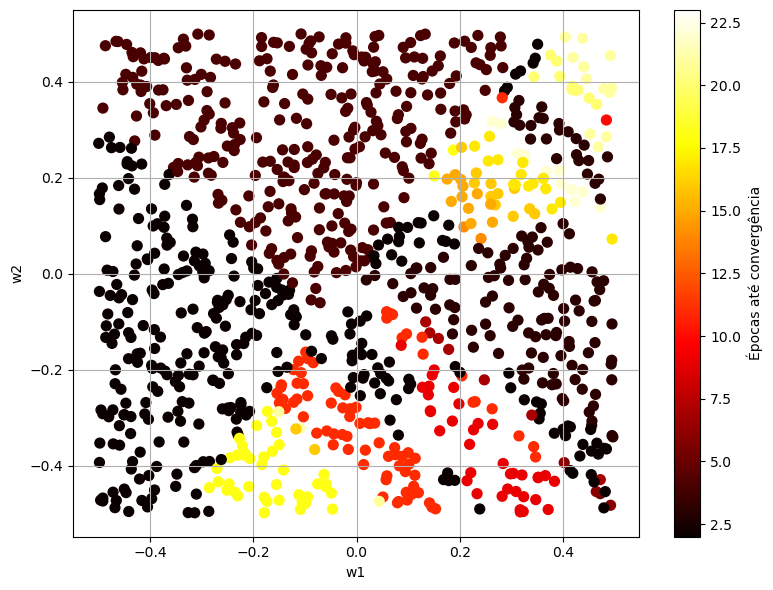

In [18]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(results[:, 1], results[:, 2], c=results[:, 3], cmap='hot', s=50)
plt.xlabel("w1")
plt.ylabel("w2")
cbar = plt.colorbar(scatter)
cbar.set_label("Épocas até convergência")
plt.grid(True)
plt.tight_layout()
plt.show()

Pode-se identificar no gráfico de dispersão as áreas com pesos que exigem mais épocas para o modelo aprender, porque começam com uma direção de decisão muito ruim. 

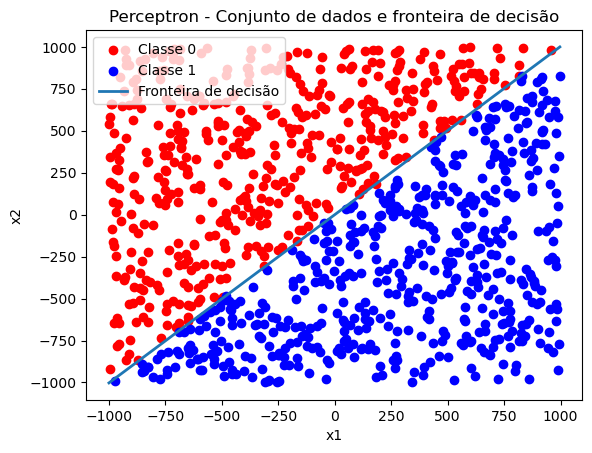

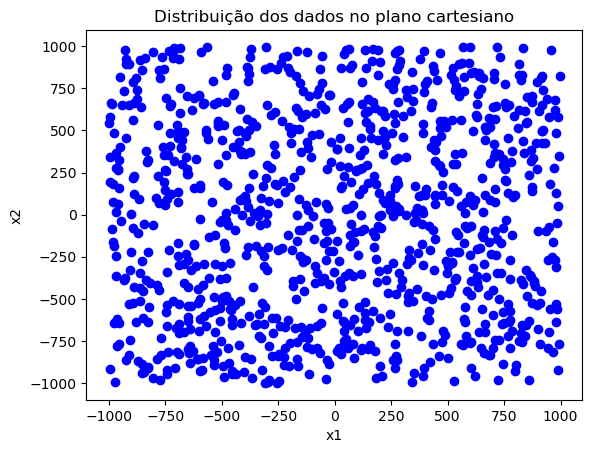

In [8]:
classe0 = X[y == 0]
classe1 = X[y == 1]

plt.scatter(classe0[:, 0], classe0[:, 1], label='Classe 0', marker='o', color='red')
plt.scatter(classe1[:, 0], classe1[:, 1], label='Classe 1', marker='o', color='blue')

w0, w1, w2 = p.w
x1_pts = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

if w2 != 0:
    x2_pts = -(w0 + w1 * x1_pts) / w2
    plt.plot(x1_pts, x2_pts, label='Fronteira de decisão', linewidth=2)
else:
    plt.axvline(x=-w0/w1, label='Fronteira de decisão', linewidth=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron - Conjunto de dados e fronteira de decisão')
plt.legend()
plt.show()

plt.scatter(X[:, 0], X[:, 1], color='blue')
#Tentativa teste de plotar os dados sem o modelo
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribuição dos dados no plano cartesiano')
plt.show()


